In [17]:
import torch
import pickle
import matplotlib.pyplot as plt

In [18]:
shp_original_img = (100, 100)
broken_image =  torch.FloatTensor( pickle.load(open('./broken_image_t.p', 'rb'),encoding='latin1' ) )
print(broken_image.shape)

torch.Size([10000])


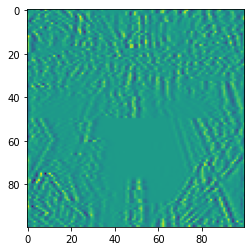

In [19]:
plt.imshow(broken_image.view(100,100)) 

In [20]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0 )
    return h

In [21]:
def distance_loss(hypothesis, broken_image):    
    return torch.dist(hypothesis, broken_image)

In [22]:
random_tensor = torch.randn(10000, dtype = torch.float)

In [23]:
lr = 0.8
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))



Loss at 0 = 12.104543685913086
Loss at 1000 = 1.128553032875061
Loss at 2000 = 0.5376666188240051
Loss at 3000 = 0.3686845898628235
Loss at 4000 = 0.28994280099868774
Loss at 5000 = 0.24176864326000214
Loss at 6000 = 0.20723673701286316
Loss at 7000 = 0.18003542721271515
Loss at 8000 = 0.1571633666753769
Loss at 9000 = 0.13698972761631012
Loss at 10000 = 0.11857472360134125
Loss at 11000 = 0.10135968029499054
Loss at 12000 = 0.08500118553638458
Loss at 13000 = 0.06928066164255142
Loss at 14000 = 0.054053641855716705
Loss at 15000 = 0.03922203183174133
Loss at 16000 = 0.02471904829144478
Loss at 17000 = 0.02116197906434536
Loss at 18000 = 0.02116660587489605
Loss at 19000 = 0.021167652681469917


In [25]:
lr = 0.2
for i in range(0,5000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 0.021167661994695663
Loss at 1000 = 0.005292050540447235
Loss at 2000 = 0.005292096175253391
Loss at 3000 = 0.005292053800076246
Loss at 4000 = 0.005292107351124287


In [27]:
lr = 0.05
for i in range(0,5000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 0.005291534587740898
Loss at 1000 = 0.0012835361994802952
Loss at 2000 = 0.0013039862969890237
Loss at 3000 = 0.0013075057649984956
Loss at 4000 = 0.001308299833908677


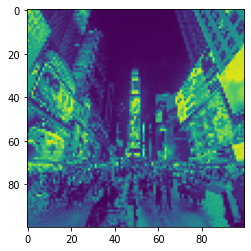

In [24]:
plt.imshow(random_tensor.view(100,100).data)

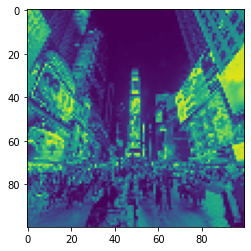

In [26]:
plt.imshow(random_tensor.view(100,100).data)

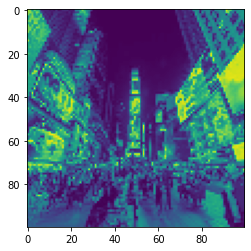

In [28]:
plt.imshow(random_tensor.view(100,100).data)